In [1]:
import torch

In [2]:
x = torch.Tensor([5,3])
y = torch.Tensor([2,1])
print(x*y)

tensor([10.,  3.])


In [3]:
x = torch.zeros([2,5])
print(x)
print(x.shape)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
torch.Size([2, 5])


In [4]:
y = torch.rand([2,5])
print(y)

tensor([[0.7373, 0.5654, 0.9389, 0.1661, 0.7422],
        [0.5708, 0.4559, 0.1480, 0.1845, 0.8116]])


In [5]:
#show in a given shape. Doesn't change y
y.view([1,10])

tensor([[0.7373, 0.5654, 0.9389, 0.1661, 0.7422, 0.5708, 0.4559, 0.1480, 0.1845,
         0.8116]])

In [6]:
import torch
import torchvision
from torchvision import transforms, datasets

In [7]:
train = datasets.MNIST("", train=True, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))



test = datasets.MNIST("", train=False, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

 

In [8]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [9]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [10]:
x,y = data[0][0], data[1][0]
print(y)

tensor(9)


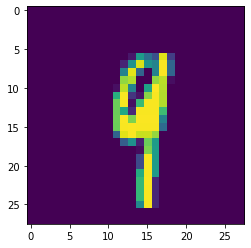

In [11]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))

In [12]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [13]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [14]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


## now We build model

In [15]:
import torch.nn as nn
import torch.nn.functional as F

In [16]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)
        
        
net = Net()
print(net)
        

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [17]:
x = torch.rand((28,28))
#-1 tells us to not worry about size
x = x.view(-1,28*28)

In [18]:
output = net(x)

In [19]:
print(output)


tensor([[-2.3062, -2.2797, -2.2119, -2.3663, -2.3080, -2.4189, -2.2832, -2.2499,
         -2.3017, -2.3148]], grad_fn=<LogSoftmaxBackward>)


In [22]:
import torch.optim as optim
#lr tells us how large of a step to get to optimum
optimizer = optim.Adam(net.parameters(), lr=.001)


#passes through data
EPOCHS=3

In [25]:
for epock in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
        
        

tensor(0.0100, grad_fn=<NllLossBackward>)
tensor(0.0051, grad_fn=<NllLossBackward>)
tensor(0.0040, grad_fn=<NllLossBackward>)


In [28]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X,y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.978


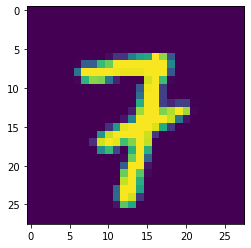

In [48]:
plt.imshow(X[9].view(28,28))
plt.show()

In [49]:
print(torch.argmax(net(X[9].view(-1,784))[0]))

tensor(7)
